1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

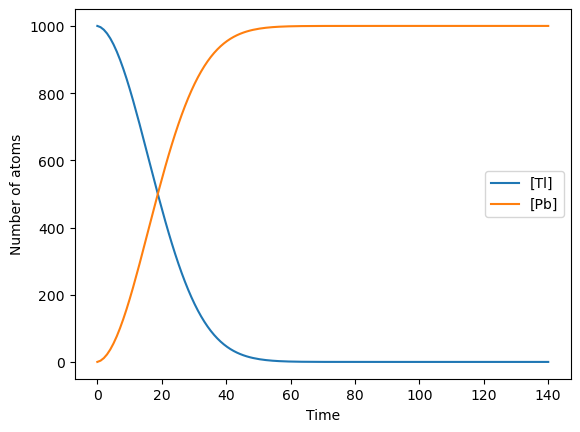

In [13]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#%precision 4

T = 3.052*60
N = 1000
def p(t):
    return 1 - 2**(-t/T) 

# List of number of atoms
Tlpoints = [1000]
Pbpoints = [0]
#At each time-step decide whether each Tl atom has decayed or no

t = 1
while Pbpoints[-1]<N:
    decay = Tlpoints[-1]*p(t)
    Tlpoints.append(Tlpoints[-1] - decay)
    Pbpoints.append(Pbpoints[-1] + decay)    
    t += 1
# Make the graph 
tpoints =np.linspace(0, t , t)
plt.plot(tpoints,Tlpoints, label='[Tl]') 
plt.plot(tpoints,Pbpoints, label='[Pb]') 
plt.legend(loc = "best")
plt.xlabel("Time") 
plt.ylabel("Number of atoms") 
plt.show()


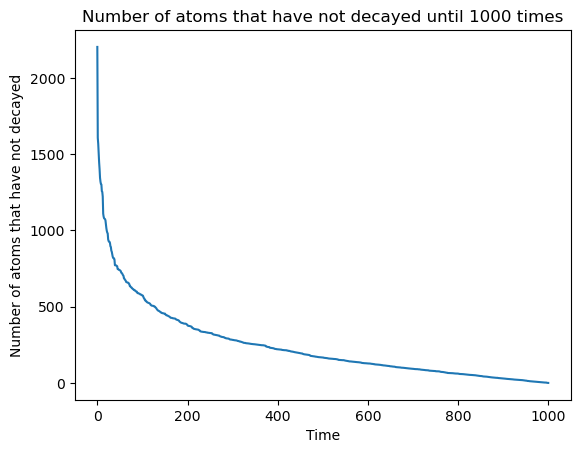

In [16]:
## INVERSE TRANSFORM METHOD
import math

T = 3.052*60
def p2(t):
    return 2**(-t/T)*math.log(2)/T

#Let's compute the inverse transform method 
def icdf_p2(t):
    return -T*np.log(1-t)/np.log(2)


# apply the inverse of the CDF
u = np.random.random(1000) #1000 random number
decay_time = icdf_p2(u) 
time = np.linspace(0,N,N)
decay_atoms_sort = np.sort(decay_time) # number of atoms that decayed (increasing)
not_decay_atoms = decay_atoms_sort[::-1] # number of atoms that have not decayed (decreasing)
plt.plot(time, not_decay_atoms) 
plt.xlabel('Time')
plt.ylabel('Number of atoms that have not decayed')
plt.title('Number of atoms that have not decayed until 1000 steps')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

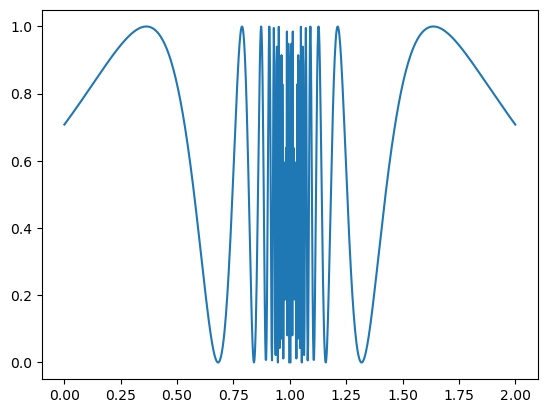

In [67]:
def f(x):
    return np.sin(1/(1-x))**2
x = np.linspace(0,2, 1000)
plt.plot(x,f(x))

In [68]:
## Hit/miss method

N = 1000
count = 0

x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2 * np.random.random() # x is random uniform between 0 and 2
    y[i] = np.random.random()     # y is random uniform between 0 and 1
    if y[i] < f(x[i]): 
        count += 1

dim = 1
I = 2**dim * count / N

I_true = stats.norm().cdf(2) - stats.norm().cdf(0)

error = np.sqrt((2-0)*(y*y).sum()/N - (2-0)*y.mean()**2)/np.sqrt(N)


print("Hit/miss integral:", I, ", rel. err:",error)

Hit/miss integral: 1.34 , rel. err: 0.012466058279589664


In [42]:
## Mean value method

x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2*np.random.random()  
    y[i] = f(x[i])  

# Calculation of the result
I2 = ((2-(0))*np.sum(y))/N

I2_true = stats.norm().cdf(2) - stats.norm().cdf(0)

error2 = np.sqrt((2-0)*(y*y).sum()/N - (2-0)*y.mean()**2)/np.sqrt(N)

print("Mean value integral:", I2, ", rel. err:",error2)

Mean value integral: 1.3604153423691017 , rel. err: 0.014659506849406213


In [40]:
# We can see that the errors are quite similar, very small (around 1%).
# But we can say that as the error is smaller for hit/miss method, this latter is better to use.

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [65]:
def f(params):
    sol = 0
    for p in params:
        sol += p**2
    if sol <= 1:
        return 1
    else:
        return 0
    
N = 1000000
# Let's using the hit/miss method
# 2D circle
count1 = 0
dim = 2

for i in range(N):
    params = [] 
    for j in range(dim):
        params.append(np.random.random())
    if (f(params)==1):
        count1 += 1
        
I_2dim = 2**dim * (count1 / N)
print("Integral of 2D circle:", I_2dim)

# 10D circle
count2 = 0
dim = 10 

for i in range(N):
    params = []
    for j in range(dim):
        params.append(np.random.random())
    if (f(params)==1):
        count2 += 1
        
I_10dim = 2**dim*(count2/N)

print("Integral of 10D circle:", I_10dim)

Integral of 2D circle: 3.142176
Integral of 10D circle: 2.583552


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [80]:
def f(x):
    return (x**(-1/2))/(np.exp(x) + 1)

def weight(x):
    return 1/np.sqrt(x)

N=10000
# Let's compute the integral of w(x) from 0 to 1, which is:
int_w = 2
x = np.random.random(N)**2
I_si = 1.0 / N * np.sum(f(x) / (weight(x))) * int_w

print("Importance sampling Integral :", I_si)
# We have a result around 0.84 as expected.

Importance sampling Integral : 0.8395026873018653
